![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/collab/Classifiers/NLU_E2E_Classification_Example.ipynb)
# E2E Classification with NLU 

# 1. Install Java and NLU

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null    

# 2. Download E2E model and predict classes for sample string

In [ ]:
import nlu
e2e_pipe  = nlu.load('e2e')
e2e_pipe.predict('E2E is a dataset for training generative models')

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,sentence_embeddings,sentence,e2e_confidence,e2e
origin_index,,,,
0,"[0.021445205435156822, -0.039284929633140564, ...",E2E is a dataset for training generative models,0.703248,customer rating[high]
0,None,None,0.703248,name[The Waterman]
0,None,None,0.703248,eatType[restaurant]
0,None,None,0.703248,priceRange[£20-25]
0,None,None,0.703248,familyFriendly[no]
0,None,None,0.703248,familyFriendly[yes]


# 3. Download Dataset

In [ ]:
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


--2020-10-26 14:32:48--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.132.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.132.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  31.9MB/s    in 6.8s    

2020-10-26 14:32:55 (35.9 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



# 4. Predict on pandas dataset and visualize predictions


In [ ]:
e2e_pipe  = nlu.load('e2e')
df['text'] = df['comment']
e2e_predictions = e2e_pipe.predict(df['text'].iloc[0:1000], output_level='sentence')
e2e_predictions

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
INFO: NLU will assume text as label column since default text column could not be find


,sentence_embeddings,sentence,e2e_confidence,e2e
origin_index,,,,
0,"[-0.06570463627576828, -0.03522053360939026, -...",NC and NH.,0.859201,eatType[restaurant]
0,None,None,0.859201,priceRange[moderate]
0,None,None,0.859201,food[English]
1,"[-0.0254225991666317, 0.05448468029499054, -0....",You do know west teams play against west teams...,0.829274,name[Wildwood]
1,None,None,0.829274,near[Ranch]
...,...,...,...,...
998,None,None,0.902405,area[riverside]
998,None,None,0.902405,familyFriendly[no]
998,None,None,0.902405,familyFriendly[yes]


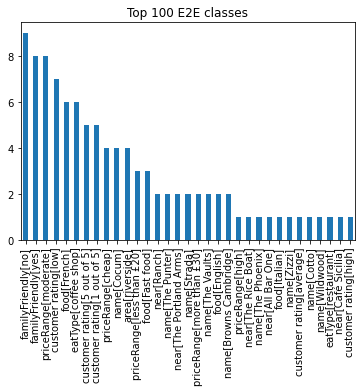

In [ ]:
e2e_predictions.explode('e2e').e2e.iloc[0:100].value_counts().plot.bar(title='Top 100 E2E classes')